In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as maths
import random as rnd
import homeostat

## Modelling the homeostat

The homeostat takes an iterative process of generating theta values, that help update the weights. 

Within a step through time, we calculate the input sum going into the system. This gathers the sum of the $\theta$ values for each unit $i$, and the final index $m-1$. The value of $\theta$ is multiplied by the weight which corresponds to each other unit. 

$I=\sum_{i=0}^{n}(\theta_{i,m-1} \times w_{i})$

Once the input sum is gathered, we perform the integration. The input sum $I$ is placed within an equation that takes biased values $k$, $l$, $p$, $q$ and $\dot{\theta }$ representing a set of velocities, accessed at the last iteration $i-1$. 

$\ddot{\theta }_{i}=-k\dot{\theta }_{i-1}+l(p-q)I$

This is used to calculate the acceleration of the system. We then integrate this to calculate the velocity. 

$\dot{\theta }_{i}=\dot{\theta }_{i-1}+\ddot{\theta }_{i-1}dt$

This is further integrated to get the position $\theta$.

$\theta_{i}=\theta_{i-1}+\dot{\theta }_{i-1}dt$

We now have $\theta_{i}$ where $i$ is the current position. This position is checked against our lower and upper bound to enforce where the position has exceeded our limits. If so, the theta value is set to the bound and our velocity is set to 0.

$(\theta_{i}>B_u \rightarrow \theta_{i}=B_u,\dot{\theta }_i = 0)\wedge (\theta_{i}<B_l \rightarrow \theta_{i}=B_l,\dot{\theta }_i = 0)$

Once the ingeration has taken place, the system can update weights based on whether or not the signal is viable. Viability defines the optimal width between two bounds. In nature, this can be approximated to having a body temperatur of around 37 degrees celcius. The weights can be adjusted through a number of ways, one of which is randomly with negative feedback. This replaces all the weights with random values between 1 and -1. 

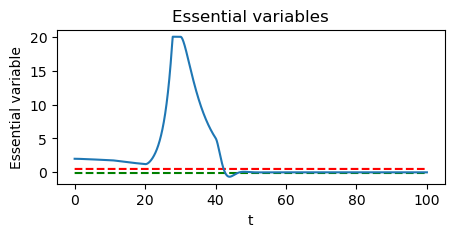

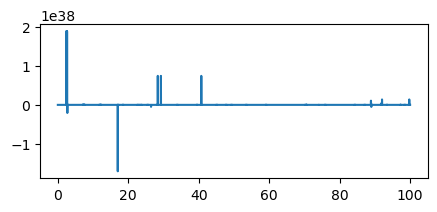

In [3]:
#define homeostat
hom = homeostat.Homeostat()

#define parameters
n_units = 1
upper_limit = 20
lower_limit = -20
upper_viability = 0.5
lower_viability = -0.1
test_interval = 10

#intialize homeostat
hom.init(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)
hom.resetWeights(-1,1) #set the random distribution
#define loop parameters
dt=0.01
t = 0
ts = [t]
duration = 100
count=0
#time loop
while t < duration:
    hom.step(dt)
    t += dt
    ts.append(t)
    count+=1
#shope output
b=hom.getUnit(0,count)
nump_hom=np.asarray(b).view(np.float32)
plt.figure(figsize=(5,2))
plt.plot(ts[0:len(nump_hom)],[upper_viability for i in range(len(ts[0:len(nump_hom)]))], 'r--', label='upper viable boundary')
plt.plot(ts[0:len(nump_hom)],[lower_viability for i in range(len(ts[0:len(nump_hom)]))], 'g--', label='lower viable boundary')
for i in range(n_units):
    b=hom.getUnit(i,count)
    nump_hom=np.asarray(b).view(np.float32)
    plt.plot(ts[0:len(nump_hom)],nump_hom)
plt.title('Essential variables')
plt.xlabel('t')
plt.ylabel('Essential variable')
plt.show()
plt.figure(figsize=(5,2))
weights=np.asarray(hom.getWeight(0,count)).view(np.float32)
plt.plot(ts[0:len(nump_hom)],weights)
plt.show()

Attempt of modelling input

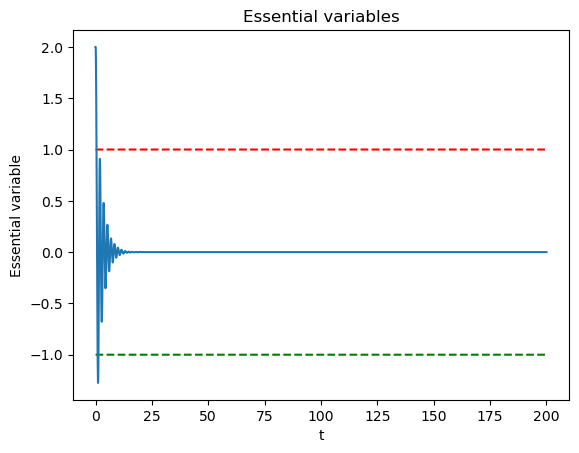

35.0


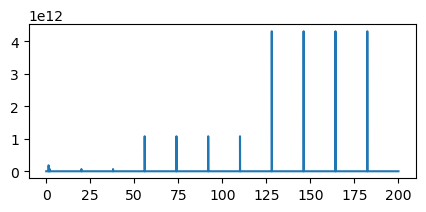

In [5]:
#define homeostat
hom = homeostat.Homeostat()

#define parameters
n_units = 1
upper_limit = 20
lower_limit = -20
upper_viability = 1
lower_viability = -1
test_interval = 1

#intialize homeostat
hom.init(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)
hom.resetWeights(-1,1) #set the random distribution
#define loop parameters
dt=0.01
t = 0
ts = [t]
duration = 200
count=0
def feedback(val):
    return rnd.randint(1,50)/1
feed=0
feeds=[]
#time loop
while t < duration:
    #feed=1
    feeds.append(feed)
    hom.step_var(dt,feed)
    b=hom.getUnit(0,count)
    item=np.asarray(b).view(np.float32)
    if len(item)>0:
        feed=feedback(item[-1])
    t += dt
    ts.append(t)
    count+=1
#shope output
b=hom.getUnit(0,count)
nump_hom=np.asarray(b).view(np.float32)
#plt.figure(figsize=(5,2))

plt.plot(ts[0:len(nump_hom)],[upper_viability for i in range(len(ts[0:len(nump_hom)]))], 'r--', label='upper viable boundary')
plt.plot(ts[0:len(nump_hom)],[lower_viability for i in range(len(ts[0:len(nump_hom)]))], 'g--', label='lower viable boundary')
for i in range(n_units):
    b=hom.getUnit(i,count)
    nump_hom=np.asarray(b).view(np.float32)
    plt.plot(ts[0:len(nump_hom)],nump_hom)

plt.title('Essential variables')
plt.xlabel('t')
plt.ylabel('Essential variable')
plt.show()
print(feed)
plt.figure(figsize=(5,2))


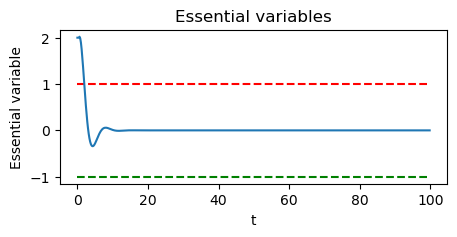

In [3]:
def feedback(val):
    return rnd.randint(1,100)/1
n_units = 1
upper_limit = 20
lower_limit = -20
upper_viability = 1
lower_viability = -1
test_interval = 10
class homeostat_client:
    def __init__(self,n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval):
        self.hom=homeostat.Homeostat()
        self.n_units=n_units
        self.upper_limit=upper_limit
        self.lower_limit=lower_limit
        self.upper_viability=upper_viability
        self.lower_viability=lower_viability
        self.test_interval=test_interval
        self.hom.init(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)
        self.counter=0
        self.ts=[]
    def resetWeights(self,min,max):
        self.hom.resetWeights(-1,1) #set the random distribution
    def runLoop(self,dt=0.05):
        t = 0
        ts = [t]
        duration = 100
        count=0
        #time loop
        while t < duration:
            self.hom.step(dt)
            t += dt
            ts.append(t)
            count+=1
        self.ts=ts
        self.counter=count
    def runFeedbackLoop(self,dt=0.05,func=feedback):
        t = 0
        ts = [t]
        duration = 100
        count=0
        #time loop
        feed=0
        #time loop
        while t < duration:
            #feed=1
            self.hom.step_var(dt,feed)
            b=self.hom.getUnit(0,count)
            item=np.asarray(b).view(np.float32)
            if len(item)>0:
                feed=func(item[-1])
            t += dt
            ts.append(t)
            count+=1
        self.ts=ts
        self.counter=count
    def getThetas(self,i):
        b=self.hom.getUnit(i,self.counter)
        nump_hom=np.asarray(b).view(np.float32)
        return nump_hom
#a more efficeint way of interfacing with the library
h=homeostat_client(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)
h.runLoop(0.2)
plt.figure(figsize=(5,2))
plt.plot(h.ts[0:h.counter],[upper_viability for i in range(len(h.ts[0:h.counter]))], 'r--', label='upper viable boundary')
plt.plot(h.ts[0:h.counter],[lower_viability for i in range(len(h.ts[0:h.counter]))], 'g--', label='lower viable boundary')
for i in range(n_units):
    b=h.getThetas(i)
    nump_hom=np.asarray(b).view(np.float32)
    plt.plot(h.ts[0:len(nump_hom)],nump_hom)
plt.title('Essential variables')
plt.xlabel('t')
plt.ylabel('Essential variable')
plt.show()   

## Experimentation 

Experimenting how parameters affect the average time


In [ ]:
import matplotlib.colors as mcolors

def runLoop(dt):
    h=homeostat_client(n_units,upper_limit,lower_limit,upper_viability,lower_viability,test_interval)
    h.runLoop(dt)
    b=h.getThetas(0)
    nump_hom=np.asarray(b).view(np.float32)
    ts=h.ts
    return nump_hom,ts
i=0
colours=mcolors.CSS4_COLORS
names = list(colours)
#plt.figure(figsize=(5,2))
for dt in range(1,50):
    dt=dt/100
    for j in range(5):
        nump_hom,ts=runLoop(dt)
        plt.plot(ts[0:len(nump_hom)],nump_hom,c=colours[names[i]])
    plt.plot(ts[0:len(nump_hom)],nump_hom,c=colours[names[i]],label=str(dt))
    i+=3

plt.plot(ts[0:len(nump_hom)],[upper_viability for i in range(len(nump_hom))], 'r--', label='upper viable boundary')
plt.plot(ts[0:len(nump_hom)],[lower_viability for i in range(len(nump_hom))], 'g--', label='lower viable boundary')
plt.legend(loc="upper right")
plt.title('Essential variables')
plt.xlabel('t')
plt.ylabel('Essential variable')
plt.show()   

## open ai gym

Lets use the homeostat to generate gym values

In [4]:
import gym
from gym import logger as gymlogger
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from copy import deepcopy as dc

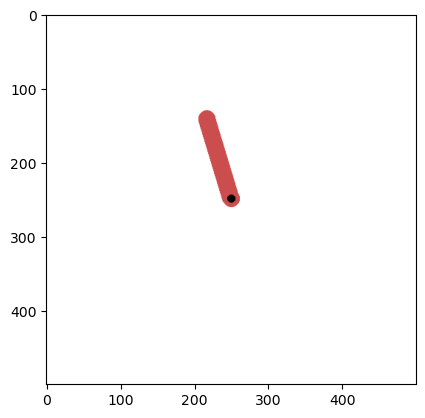

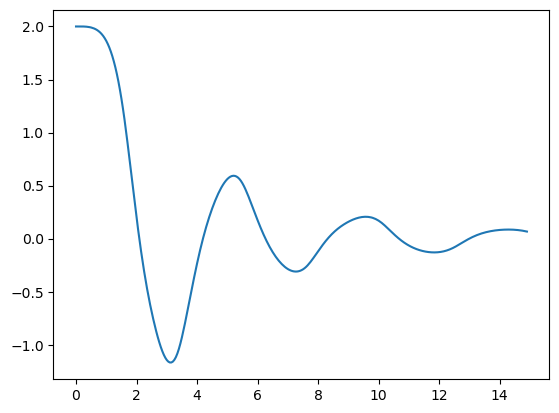

In [27]:
SIM='Pendulum-v1'

def run_trial(num_trials):
    #setup gym
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    observations=[]
    totalFit=-100
    best_obvs=[]
    #homeostat setup
    dt=0.05
    h=homeostat_client(n_units,2,-2,upper_viability,lower_viability,test_interval) #create agent
    b=h.hom.getUnit(0,1)
    feed=np.asarray(b).view(np.float32)
    action=0
    t=0
    ts = [t]
    #main loop
    for _ in range(num_trials):
        h.hom.step_var(dt,feed)
        b=h.hom.getUnit(0,_)
        action=np.asarray(b).view(np.float32)
        if len(action)>0:
            action=[action[-1]]
        else: action=[0]
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        action = h.hom.step_var(dt,feed)
        rewards+=reward
        feed=maths.acos(observation[0])
        if terminated or truncated: #environment finished
            observation, info = env.reset()
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(observations) #copy obs
            observations=[]
        t += dt
        ts.append(t)
    endObs=observation
    #get end positions
    b=h.hom.getUnit(0,_)
    feed=np.asarray(b).view(np.float32)
    return rewards,best_obvs,env.render(),[ts,feed]

def fitness(observation):
    best=[0.6, 0.07]
    worst=[-1.2, -0.07]
    return ((observation[0]))/(best[0]+abs(worst[0]))#*0.5 + (abs(observaion[])/(best[1]+abs(worst[1])))*0.5


c=run_trial(300)
plt.imshow(c[2])
plt.show()

plt.plot(c[3][0][0:len(c[3][1])],c[3][1])
plt.show()

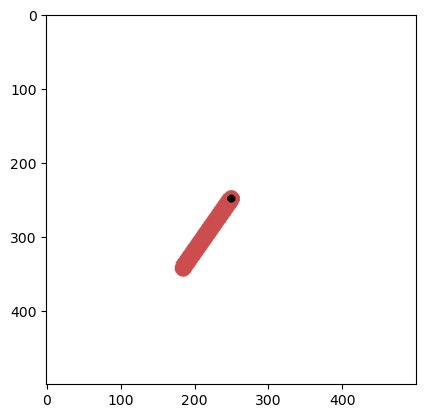

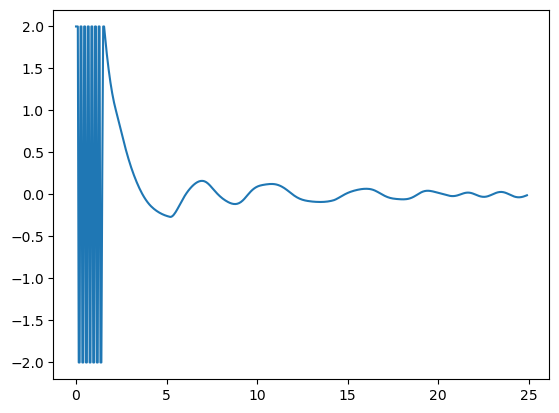

In [17]:
SIM='Pendulum-v1'
filepath="C:/Users/dexte/OneDrive/Pictures/Saved Pictures/PhD chaos/AutoGen/"
upper_viability = 1
lower_viability = 0.5
def save_trial(num_trials):
    #setup gym
    env = gym.make(SIM,g=5,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    observations=[]
    totalFit=-100
    best_obvs=[]
    n_units=2
    test_interval=1
    #homeostat setup
    dt=0.05
    h=homeostat_client(n_units,2,-2,upper_viability,lower_viability,test_interval) #create agent
    b=h.hom.getUnit(0,1)
    feed=np.asarray(b).view(np.float32)
    action=0
    t=0
    ts = [t]
    #main loop
    for _ in range(num_trials):
        h.hom.step_var(dt,feed)
        b=h.hom.getUnit(0,_)
        F=np.asarray(b).view(np.float32)
        if len(F)>0:
            action=[F[-1]]
        else: action=[0]
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        action = h.hom.step_var(dt,feed)
        rewards+=reward
        feed=maths.acos(observation[0])
        if terminated or truncated: #environment finished
            observation, info = env.reset()
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(observations) #copy obs
            observations=[]
        fig, axes = plt.subplots(2,1)
        #axes[0].figure(figsize=(5,1))
        axes[0].set_title("A: Homeostat Signal", loc="left")
        axes[0].plot(ts[0:len(F)],F)

        axes[1].set_title("B: Agent", loc="left")
        axes[1].imshow(env.render())
        axes[1].xaxis.set_visible(False)
        axes[1].yaxis.set_visible(False)
        fig.tight_layout(pad=0.05)
        fig.savefig(filepath+"save"+str(_)+".png")
        plt.close()
        t += dt
        ts.append(t)
    endObs=observation
    #get end positions
    b=h.hom.getUnit(0,_)
    feed=np.asarray(b).view(np.float32)
    return rewards,best_obvs,env.render(),[ts,feed]

c=save_trial(500)
plt.imshow(c[2])
plt.show()

plt.plot(c[3][0][0:len(c[3][1])],c[3][1])
plt.show()

Attempt on a different dimulation

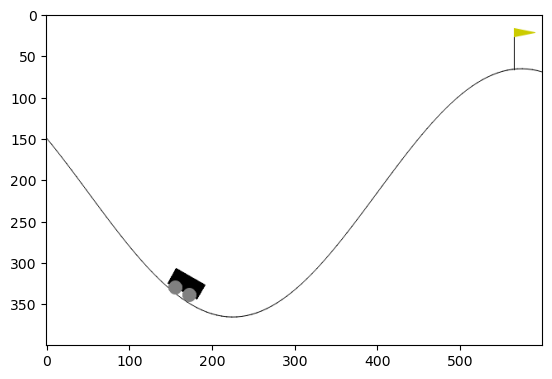

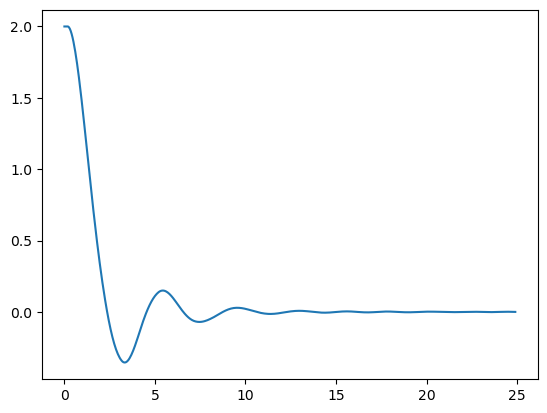

In [33]:
SIM='MountainCar-v0'
filepath="C:/Users/dexte/OneDrive/Pictures/Saved Pictures/PhD chaos/AutoGen/"
upper_viability = 1
lower_viability = 0.5
def save_trial_m(num_trials):
    #setup gym
    env = gym.make(SIM,render_mode="rgb_array")
    observation, info = env.reset()
    rewards=0
    observations=[]
    totalFit=-100
    best_obvs=[]
    n_units=1
    test_interval=1
    #homeostat setup
    dt=0.05
    h=homeostat_client(n_units,2,-2,upper_viability,lower_viability,test_interval) #create agent
    b=h.hom.getUnit(0,1)
    feed=np.asarray(b).view(np.float32)
    action=0
    t=0
    ts = [t]
    #main loop
    for _ in range(num_trials):
        h.hom.step_var(dt,feed)
        b=h.hom.getUnit(0,_)
        F=np.asarray(b).view(np.float32)
        if len(F)>0: 
            if F[-1]>1: action=1
            elif F[-1]<-1: action=-1
            else: action=round(F[-1])
        else: action=0
        observation, reward, terminated, truncated, info = env.step(action) #step through with each action
        action = h.hom.step_var(dt,feed)
        rewards+=reward
        feed=float(0.6-observation[0])
        if terminated or truncated: #environment finished
            observation, info = env.reset()
            if sum(observations)>=totalFit: #save best observaations
                totalFit=sum(observation)
                best_obvs=dc(observations) #copy obs
            observations=[]
        fig, axes = plt.subplots(2,1)
        #axes[0].figure(figsize=(5,1))
        axes[0].set_title("A: Homeostat Signal", loc="left")
        axes[0].plot(ts[0:len(F)],F)

        axes[1].set_title("B: Agent", loc="left")
        axes[1].imshow(env.render())
        axes[1].xaxis.set_visible(False)
        axes[1].yaxis.set_visible(False)
        fig.tight_layout(pad=0.05)
        fig.savefig(filepath+"save"+str(_)+".png")
        plt.close()
        t += dt
        ts.append(t)
    endObs=observation
    #get end positions
    b=h.hom.getUnit(0,_)
    feed=np.asarray(b).view(np.float32)
    return rewards,best_obvs,env.render(),[ts,feed]

c=save_trial_m(500)
plt.imshow(c[2])
plt.show()

plt.plot(c[3][0][0:len(c[3][1])],c[3][1])
plt.show()